# A/B-тестирование

Отдел маркетинга подготовил список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить А/В-тест и проанализировать результаты.




### Описание данных

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.



- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Оглавление

#### Глава 1. Загрузка библиотек и данных

- Импорт библиотек
- Загрузка данных и изучение общей информации

#### Глава 2. Приоритезация гипотез

- Используем фреймворк ICE
- Используем фреймворк RICE
- Вывод

#### Глава 3. Анализ A/B-теста

- Строим график коммулятивной выручки по группам
- Строим график кумулятивного среднего чека
- Строим график относительного изменения кумулятивного среднего чека группы B к группе A
- Строим график кумулятивной конверсии по группам
- Строим график относительного изменения кумулятивной конверсии группы B к группе A
- Строим точечный график количества заказов по пользователям
- Рассчитываем 95-й и 99-й перцентили количества заказов на пользователя
- Строим точечный график количества заказов по пользователям
- Рассчитываем 95-й и 99-й перцентили количества заказов на пользователя
- Строим точечный график стоимостей заказов
- Рассчитываем 95-й и 99-й перцентили стоимости заказов
- Рассчитываем статистическую значимость различий в конверсии между группами по «сырым» данным
- Рассчитываем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
- Рассчитываем статистическую значимость различий в конверсии между группами по «очищенным» данным
- Рассчитываем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

- Вывод

### Глава 1. Загрузка библиотек и данных


## Импорт библиотек


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 
from scipy import stats as st
import datetime as dt

### Загрузка данных и изучение общей информации


In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 150
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors.info()
print()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

In [7]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Количество столбцов совпадает с заявленным. Пропущенных значений не обнаружено. Однако временные показатели представлены в строковом формате. Данные значения необходимо привести к формату даты.

In [8]:
# Переводим в формат даты
visitors['date'] = pd.to_datetime(
    visitors['date'],
    format = '%Y-%m-%d'
)
orders['date'] = pd.to_datetime(
    orders['date'],
    format = '%Y-%m-%d'
)

Для того, чтобы избежать ошибок при дальнейшем анализе и проведении А/В-теста, мы должны убедиться в равном количестве пользователей из двух групп. 



In [9]:
if (visitors[visitors['group'] == 'A']['visitors'].sum()) == (visitors[
    visitors['group'] == 'B']['visitors'].sum()):
    print('Разделение на группы равномерное')
else:
    print('Разделение на группы неравномерное, относительная разница (А-В)/А = {:.2%}'.format(
    (visitors[
        visitors['group'] == 'A']['visitors'].sum() - visitors[
        visitors['group'] == 'B']['visitors'].sum()) / visitors[
        visitors['group'] == 'A']['visitors'].sum()))

Разделение на группы неравномерное, относительная разница (А-В)/А = -0.96%


Данная разница принимается, так как не превышает 1 %. Таким образом, группы формируются относительно равномерно. 

## Глава 2. Приоритезация гипотез

### Используем фреймворк ICE

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач. Рассчитывается по следующией формуле: ICE = Impact * Confidence / Effort

In [10]:
# ICE_score — колонка с оценкой гипотезы
hypothesis['ICE_score'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(1)
hypothesis.sort_values(by = 'ICE_score', ascending = False).reset_index()

,index,Hypothesis,Reach,Impact,Confidence,Efforts,ICE_score
0,8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
1,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
2,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
3,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
4,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
5,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
6,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
7,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
8,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


Гипотеза о запуске скидочной акции лидирует (16.2) по приоритету. Видимо быстрые продажи считаются самыми лучшими. На втором месте, гипотеза о добавлении двух новых каналов для привлчения трафика (13.3). Также, в тройке лидиров гипотеза о добавлении формы подписки на все основные страницы, для получения emailов (11.2).
Однако в данном анализе не учитывается охват аудитории, которую затронут данные изменения. Это существенно влияет на распределение гипотез. Поэтому рассчитаем показатель RICE.	

### Используем фреймворк RICE

RICE (R от англ. reach, «охват»). Модифицированная версия ICE. Рассчитывается по формуле: RICE = (Reach * Impact * Confidence) / Effort

In [11]:
# RICE_score — колонка с оценкой гипотезы
hypothesis['RICE_score'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'])
hypothesis.sort_values(by = 'RICE_score', ascending = False).reset_index()

,index,Hypothesis,Reach,Impact,Confidence,Efforts,ICE_score,RICE_score
0,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
1,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
2,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
3,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
4,8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
5,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
6,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
7,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
8,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


С учетом охвата аудитории, список приоритизированных гипотез изменился. Гипотеза о добавлении формы подписки для сбора базы email-рассылки значительно превосходит остальные (112). Далее идет гипотеза о добавлении блоков рекомендаций товаров для повышения конверсии в средний чек (56). Также, в тройке лидиров гипотезы о привлечении трафика и показах баннеров с актуальными акциями (40).

Стоит отметить, что первые две гипотезы были в приоритетном списке посчитаном с помощью ICE. Только имели более низкие значения. 

### Вывод

При использовании различных фреймвороков были получены различные результаты в распределении гипотез по приоритету. Наиболее приоритетной для проведения тестирования является гипотеза о добавлении формы подписки на все основные страницы, чтобы увеличивать базу клиентов для email-рассылок. Однако, в данной гипотезе ничего не говорится о получении ожидаемого результата. То есть, того, что должно получиться в итоге — увеличение конверсии, или увеличение среднего чека, или увеличение регистраций и т.д. Поэтому для проведения А/В-теста мы выбираем другую гипотезу:

- Увеличение конверсии и среднего чека заказа, в результате добавления блоков рекомендаций. 

В целом, можно предположить, что основная маркетинговая стратегия заключается в получении emailов, для формирования масштабной базы рассылок. Чтобы потом разделять пользователей на когорты и переводить на продажу из письма. Также, повышение конверсии за счет времени пребывание на сайте и алгоритма доп товара (рекомендуемого) переводящим в продажу. Дополнительно работают акционные баннеры. Скорее всего, такая стратегия приведет к быстрым продажам, но «отмиранию» пользователей и отсутствию постоянной клиентской базы. 

- Необходимо больше информации об интернет-магазине и предоставляемых товарах. 

Изменения приоритета гипотезы о акции на день рождение после подсчета с помощью ICE и RICE, возможно связано с тем, что пользователи в основном не указывают дату рождения при регистрации и у компании нет соответствующих данных. 

## Глава 3. Анализ A/B-теста

### Строим график коммулятивной выручки по группам

In [12]:
# Разделение по группам
visitors_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]

# Переименование столбцов
visitors_A.columns = ['date', 'A_visitors']
visitors_B.columns = ['date', 'B_visitors']

# Получаем кумулятивные данные по посещениям и по группам
visitors_A_cumm = visitors_A.apply(
    lambda x: visitors_A[visitors_A['date'] < x['date']].agg({
        'date':'max',
        'A_visitors':'sum'
    }), axis = 1)

visitors_B_cumm = visitors_B.apply(
    lambda x: visitors_B[visitors_B['date'] < x['date']].agg({
        'date':'max',
        'B_visitors':'sum'
    }), axis = 1)

# Переименование столбцов
visitors_A_cumm.columns = ['date', 'cummulative_visitors_A']
visitors_B_cumm.columns = ['date', 'cummulative_visitors_B']

In [13]:
visitors_A_cumm.head() # Проверяем

,date,cummulative_visitors_A
0,NaT,0
1,2019-08-01,719
2,2019-08-02,1338
3,2019-08-03,1845
4,2019-08-04,2562


In [14]:
# разделение заказов по группам
orders_A = orders[orders['group'] == 'A'].groupby(
    'date', as_index = False).agg({
    'transactionId':pd.Series.nunique,
    'revenue':'sum'
})

orders_B = orders[orders['group'] == 'B'].groupby(
    'date', as_index = False).agg({
    'transactionId':pd.Series.nunique,
    'revenue':'sum'
})

# Переименование столбцов
orders_A.columns = ['date', 'A_ordersPerDate', 'A_revenuePerDate']
orders_B.columns = ['date', 'B_ordersPerDate', 'B_revenuePerDate']

# Получаем кумулятивные данные по заказам
orders_A_cumm = orders_A.apply(lambda x:
            orders_A[orders_A['date'] < x['date']].agg({
                'date':'max',
                'A_ordersPerDate':'sum',
                'A_revenuePerDate':'sum'}), axis = 1).sort_values('date')

orders_B_cumm = orders_B.apply(lambda x:
            orders_B[orders_B['date'] < x['date']].agg({
                'date':'max',
                'B_ordersPerDate':'sum',
                'B_revenuePerDate':'sum'}), axis = 1).sort_values('date')

# Переименование столбцов
orders_A_cumm.columns = ['date', 'cummulative_orders_A', 'cummulative_revenue_A']
orders_B_cumm.columns = ['date', 'cummulative_orders_B', 'cummulative_revenue_B']

In [15]:
orders_A_cumm.head()

,date,cummulative_orders_A,cummulative_revenue_A
1,2019-08-01,24,148579
2,2019-08-02,44,242401
3,2019-08-03,68,354874
4,2019-08-04,84,425699
5,2019-08-05,109,549917


In [16]:
orders_A.head()

,date,A_ordersPerDate,A_revenuePerDate
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [17]:
# Объединяем кумулятивные данные в одну таблицу
data_cumm = orders_A.merge(orders_B, on = 'date', how = 'left')\
    .merge(orders_A_cumm, on='date', how='left')\
    .merge(orders_B_cumm, on='date', how='left')\
    .merge(visitors_A, on='date', how='left')\
    .merge(visitors_B, on='date', how='left')\
    .merge(visitors_A_cumm, on='date', how='left')\
    .merge(visitors_B_cumm, on='date', how='left')

In [18]:
data_cumm.head() # Проверяем

,date,A_ordersPerDate,A_revenuePerDate,B_ordersPerDate,B_revenuePerDate,cummulative_orders_A,cummulative_revenue_A,cummulative_orders_B,cummulative_revenue_B,A_visitors,B_visitors,cummulative_visitors_A,cummulative_visitors_B
0,2019-08-01,24,148579,21,101217,24.0,148579.0,21.0,101217.0,719,713,719.0,713.0
1,2019-08-02,20,93822,24,165531,44.0,242401.0,45.0,266748.0,619,581,1338.0,1294.0
2,2019-08-03,24,112473,16,114248,68.0,354874.0,61.0,380996.0,507,509,1845.0,1803.0
3,2019-08-04,16,70825,17,108571,84.0,425699.0,78.0,489567.0,717,770,2562.0,2573.0
4,2019-08-05,25,124218,23,92428,109.0,549917.0,101.0,581995.0,756,707,3318.0,3280.0


In [19]:
# Для удобства в отображении значений на графике сделаем колонку с днем и месяцев в объединенной таблице
data_cumm['date_month_day'] = data_cumm['date'].dt.strftime('%d-%m')

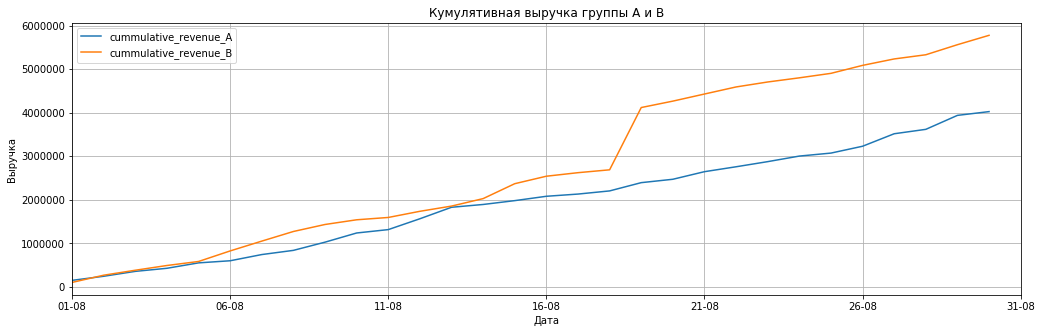

In [20]:
data_cumm.plot(
        x = 'date_month_day',
        y = ['cummulative_revenue_A', 'cummulative_revenue_B'],
        grid=True, legend=True,
        title='Кумулятивная выручка группы А и В',
        figsize=(17,5)
)
plt.xlabel('Дата')
plt.ylabel('Выручка');

В целом кумулятивная выручка группы В значительно выше. Лишь в первую неделю кумулятивная выручка двух групп находится на одинаковом уровне. К концу первой недели преобладает выручка группы В. Однако примерно в середине августа наблюдается скачок в выручке группы В. Предполагаем, что присутствует аномальная покупка, поэтому отфильтровать значения и продолжить А/В-тестирование. 

### Строим график кумулятивного среднего чека

Разделим кумулятивную выручку на кумулятивное число заказов

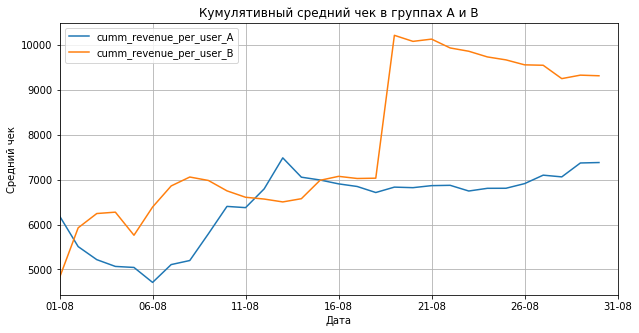

In [21]:
data_cumm['cumm_revenue_per_user_A'] = data_cumm['cummulative_revenue_A'] / data_cumm['cummulative_orders_A']
data_cumm['cumm_revenue_per_user_B'] = data_cumm['cummulative_revenue_B'] / data_cumm['cummulative_orders_B']
data_cumm.plot(
        x = 'date_month_day',
        y = ['cumm_revenue_per_user_A', 'cumm_revenue_per_user_B'],
        grid = True,
        legend = True,
        title = 'Кумулятивный средний чек в группах А и В',
        figsize = (10, 5)
)
plt.ylabel('Средний чек')
plt.xlabel('Дата');

Схожая картина с графиком кумулятивной выручки. Резкий рост среднего чека наблюдается 19го августа у группы В. После отмечается спад. Но в основном средний чек группы В значительно больше, чем в группе А. Редкие высокие значения по среднему чеку у группы А могут быть связаны с попаданием крупных заказов в данную группу. 

### Строим график относительного изменения кумулятивного среднего чека группы B к группе A

Добавим горизонтальную ось методом axhline()

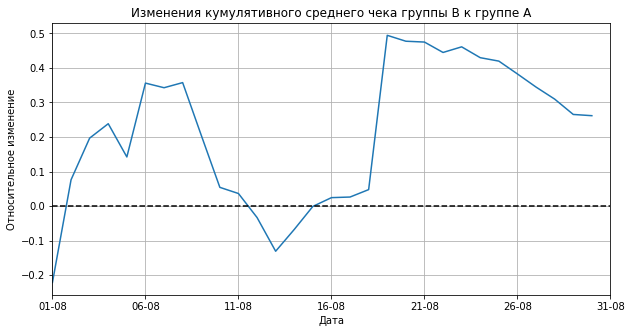

In [22]:
# cтроим отношение средних чеков
data_cumm['B_on_A_revenue_cumm'] = (
    data_cumm['cumm_revenue_per_user_B'] / data_cumm['cumm_revenue_per_user_A']) - 1
data_cumm.plot(
        x = 'date_month_day',
        y = 'B_on_A_revenue_cumm',
        grid=True, legend=False,
        title='Изменения кумулятивного среднего чека группы B к группе A',
        figsize=(10,5)
)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Относительное изменение')
plt.xlabel('Дата');

Относительное изменение среднего чека группы В к группе А в первой половине месяца сильно колеблется. Аномальный «скачок» 19го августа, так же отразился на этом графике. Если не принимать во внимание данную крупную покупку, то вероятно, что средний чек группы В будет ниже среднего чека группы А к концу месяца. Данные значения существенно искажают результаты А/В-тестирования.

### Строим график кумулятивной конверсии по группам

Аналогично проанализируем график кумулятивной конверсии. 

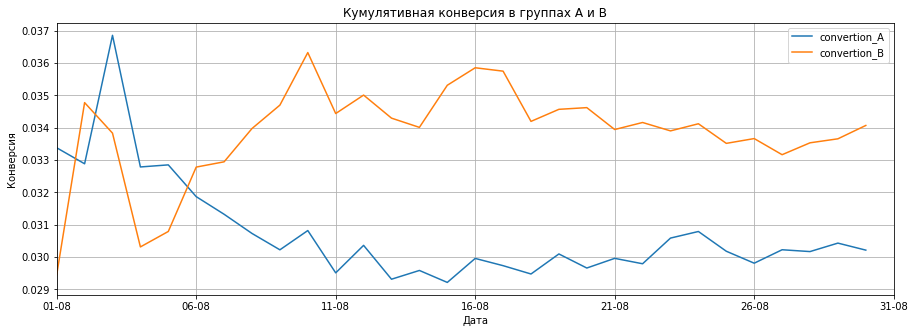

In [23]:
# считаем кумулятивную конверсию
data_cumm['convertion_A'] = data_cumm['cummulative_orders_A'] / data_cumm['cummulative_visitors_A']
data_cumm['convertion_B'] = data_cumm['cummulative_orders_B'] / data_cumm['cummulative_visitors_B']
data_cumm.plot(
        x = 'date_month_day',
        y = ['convertion_A', 'convertion_B'],
        grid=True, legend=True,
        title='Кумулятивная конверсия в группах А и В',
        figsize=(15,5)
)
plt.ylabel('Конверсия')
plt.xlabel('Дата');

К концу месяца показатели конверсии стабилизируются. Конверсия группы В на 0,4% больше, чем у группы А.

### Строим график относительного изменения кумулятивной конверсии группы B к группе A

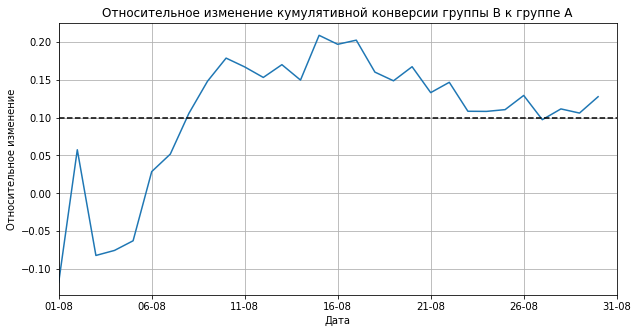

In [24]:
data_cumm['B_on_A_convertion'] = (
    data_cumm['convertion_B'] / data_cumm['convertion_A']) - 1
data_cumm.plot(
        x = 'date_month_day',
        y = 'B_on_A_convertion',
        grid=True, legend=False,
        title='Относительное изменение кумулятивной конверсии группы B к группе A',
        figsize=(10,5)
)
plt.axhline(y=0.1, color='black', linestyle='--')
plt.ylabel('Относительное изменение')
plt.xlabel('Дата');

Относительное изменение кумулятивной конверсии группы В к группе А к концу месяца отмечается на отметке 0,1. В целом конверсия группы В на 10% больше конверсии группы А. Различные колебания на графике трудно интерпертировать однозначно. 

### Строим точечный график количества заказов по пользователям

In [25]:
ordersByUsers = orders[['visitorId', 'transactionId']].groupby(
    'visitorId', as_index = False)['transactionId'].count().reset_index()
ordersByUsers.columns = ['numb', 'user_id', 'orders_count']
ordersByUsers.sort_values(by='orders_count', ascending = False).head(7)

,numb,user_id,orders_count
1023,1023,4256040402,11
591,591,2458001652,11
569,569,2378935119,9
487,487,2038680547,8
44,44,199603092,5
744,744,3062433592,5
55,55,237748145,5


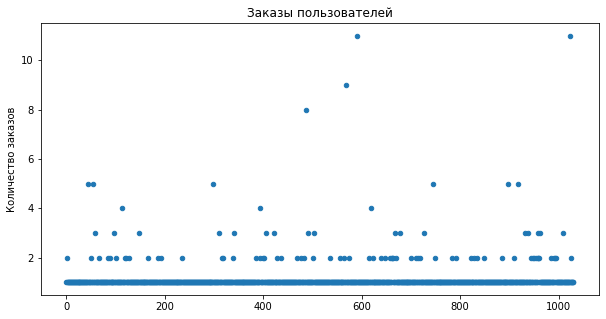

In [26]:
ordersByUsers.plot(
        kind = 'scatter',
        x = 'numb',
        y = 'orders_count',
        title = 'Заказы пользователей',
        figsize=(10,5)
)
plt.ylabel('Количество заказов')
plt.xlabel('');

За исследуемый период основаная часть пользователей совершала 1 заказ, реже — 2 заказа. Редкие пользователи совершают более 3х заказов.

### Рассчитываем 95-й и 99-й перцентили количества заказов на пользователя

Для подсчёта перцентилей применяется метод percentile() библиотеки Numpy

In [27]:
np.percentile(ordersByUsers['orders_count'], [95,99])
orders_lim = 3

Учитывая, что лишь 5% пользователей совершали более двух заказов, будем считать границей «аномального» количества заказов более 3х на клиента за отчетный период.

### Строим точечный график стоимостей заказов

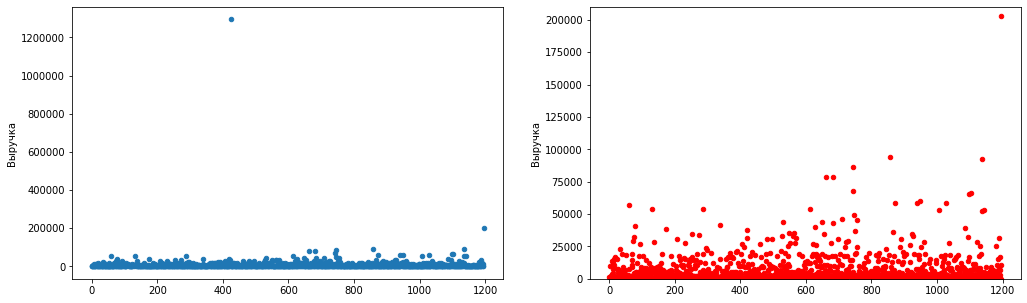

In [28]:
orders['x_values'] = range(0, len(orders))
plt.subplots(figsize = (17,5))
plot = orders.plot(
        kind = 'scatter',
        x = 'x_values',
        y = 'revenue',
        ax = plt.subplot(1,2,1)
)
plt.xlabel('')
plt.ylabel('Выручка');

plot = orders.plot(
        kind = 'scatter',
        x = 'x_values',
        y = 'revenue',
        ax = plt.subplot(1,2,2),
        color = 'red'
)
plt.xlabel('')
plt.ylabel('Выручка')
plt.ylim(0,210000);

Как мы видим, большая часть заказов не превышает 25 тыс.рублей (график справа). Основная часть заказов сосредоточена в районе 15 тыс. рублей. Помимо этого, наблюдается несколько аномально высоких значений: заказ превышающий стоимость в 1 млн. рублей и заказ стоимость около 200 тыс. рублей. Для более точного определения границы аномалии заказов посчитаем 95-й и 99-й перцентили стоимости заказов.

### Рассчитываем 95-й и 99-й перцентили стоимости заказов

In [29]:
np.percentile(orders['revenue'], [95,99])
revenue_lim = 35000

Лишь 5% пользователей совершили заказы превышающие 28 тыс. рублей. И 1% пользователей — более 58 тыс. рублей. Учитывая полученый график мы определим границу аномальных заказов в 35 000 рублей.

### Рассчитываем статистическую значимость различий в конверсии между группами по «сырым» данным

Данный рассчет будет провоидтся по «сырым» данным с учетом аномальных значений.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [30]:
# Пользователи совершающие заказы и количество их заказов
ordersByUsersA = orders[orders['group'] == 'A'].groupby(
    'visitorId', as_index = False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB = orders[orders['group'] == 'B'].groupby(
    'visitorId', as_index = False).agg({'transactionId': pd.Series.nunique})

# Даем названия столбцам
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB.columns = ['userId', 'orders']

# Объявим переменные sample_A и sample_B, в которых пользователям из разных групп будет соответствовать количество заказов
sample_A = pd.concat([
    ordersByUsersA['orders'],
    pd.Series(0, index = np.arange(data_cumm['A_visitors'].sum() - len(
        ordersByUsersA['orders'])),
             name = 'orders')], axis = 0)

sample_B = pd.concat([
    ordersByUsersB['orders'],
    pd.Series(0, index = np.arange(data_cumm['B_visitors'].sum() - len(
        ordersByUsersB['orders'])),
             name = 'orders')], axis = 0)

# Список индексов создали функцией np.arange()
# Последовательности объединяем функцией pd.concat() 

Применяем метод Манна-Уитни st.mannwhitneyu() (от англ. «U-критерий Манна-Уитни»).

Критерий значимости определяем 0,05

In [31]:
print('p-value Манна-Уитни: {:.3f}'.format(st.mannwhitneyu(
        sample_A,
        sample_B)[1]))
print('Различия в конверсии между группами: {:.1%}'.format(
        sample_B.mean()/sample_A.mean() - 1))

p-value Манна-Уитни: 0.008
Различия в конверсии между группами: 13.8%


По «сырым» данным конверсия группы В больше примерно на 14% в сравнении с группой А. Данное значение является статистически значимым. Однако представленные результаты могут быть искажены из-за наличия аномальных значений.

### Рассчитываем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.

Уровень значимости 5%

In [32]:
print('p-value Манна-Уитни: {:.3f}'.format(
    st.mannwhitneyu(
        orders[orders['group'] == 'A']['revenue'],
        orders[orders['group'] == 'B']['revenue']
    )[1]))

print('Относительный прирост среднего чека: {:.1%}'.format(
    orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean()-1))

p-value Манна-Уитни: 0.365
Относительный прирост среднего чека: 25.9%


Показатель p-value значительно выше уровня статистической значимости. Это говорит нам о том, что между группами А и В нет статистически значимых различий в значениях среднего чека. Однако, значение в группе В значительно выше, чем в группе А (~26%). Скорее всего, это связано с наличием 
аномально высоких покупок совершенных 19го августа. 

### Рассчитываем статистическую значимость различий в конверсии между группами по «очищенным» данным

In [33]:
# Найдем пользователя совершившего покупку 19го августа и узнаем сумму
orders[np.logical_and(orders['date'] == '2019-08-19', orders['revenue'] > 100000)]

,transactionId,visitorId,date,revenue,group,x_values
425,590470918,1920142716,2019-08-19,1294500,B,425


Таким образом, аномальная покупка в группе В, в размере 1 294 500 рублей, совместно с другими выбросами оказывает существенное влияние на результаты статистических методов. 

Также, ранее мы определили границы отделяющие аномальные значения:
- количество покупок — не более 3х
- сумма выручки с заказа — не более 30 тыс. рублей


Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

In [34]:
# Делаем срез пользователей по превышающему количеству заказов
users_many_orders = pd.concat([
        ordersByUsersA[ordersByUsersA['orders'] > orders_lim]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_lim]['userId']
], axis = 0)

# Делаем срез пользователей по сверхдорогим заказам
users_expensive = orders[orders['revenue'] > revenue_lim]['visitorId']

# Объединяем их в таблицу «аномальных» пользователей
abnormal_users = pd.concat([
    users_many_orders,
    users_expensive
], axis = 0).drop_duplicates().sort_values()

print(abnormal_users.head())
print()
print('Количество аномальных пользователей: ', abnormal_users.shape)

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
dtype: int64

Количество аномальных пользователей:  (42,)


Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [35]:
sample_A_filtered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormal_users))]['orders'],
    pd.Series(0, index = np.arange(data_cumm['A_visitors'].sum() - len(
    ordersByUsersA['orders'])), name = 'orders')], axis = 0)

sample_B_filtered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormal_users))]['orders'],
    pd.Series(0, index = np.arange(data_cumm['B_visitors'].sum() - len(
    ordersByUsersB['orders'])), name = 'orders')], axis = 0)

In [36]:
print('p-value Манна-Уитни: {:.3f}'.format(st.mannwhitneyu(
    sample_A_filtered,
    sample_B_filtered)[1]))
print('Различия в конверсии между группами: {:.1%}'.format(
    sample_B_filtered.mean() / sample_A_filtered.mean() - 1))

p-value Манна-Уитни: 0.007
Различия в конверсии между группами: 15.5%


После отчистки данных от аномальных значений, статистическая значимость роста конверсии в группе В сохраняется и равна 15%.

### Рассчитываем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным


Уровень статистической значимости 0,05

In [37]:
print('p-value Манна-Уитни: {:.3f}'.format(
    st.mannwhitneyu(
        orders[np.logical_and(
            orders['group'] == 'A',
            np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
        orders[np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue']
    )[1]))

print('Относительный прирост среднего чека: {:.1%}'.format(
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() / orders[
        np.logical_and(orders['group'] == 'A',
                       np.logical_not(
                           orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1))

p-value Манна-Уитни: 0.437
Относительный прирост среднего чека: 2.5%


После отчистки данных от аномальных значений, между группами по-прежнему нет статистически значимых различий в значениях среднего чека. Величина относительного прироста среднего чека группы В к группе А скорректировалась до 2,4%.

## Вывод

Мы провели анализ А/В-тестирования по гипотезе о добавлении блоков рекомендаций товаров на сайт интернет магазина, для повышения конверсии и среднего чека заказа. 

В результате анализа данных проведенного теста мы выявили:

- Присутствует статистически значимой различие по конверсии между группами и по «сырым», и по отфильтрованным данным. Прирост конверсии в группе В (исследуемая группа) в сравнении с группой А равен 15%. То есть, группа В имеет более высокую конверсию чем группа А.

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. После удаления аномальных значений уровень среднего чека в исследуемой группе составил 2% к концу месяца. 

- График различия конверсии между группами сообщает, что результаты группы B значительно лучше группы A и есть тенденця к стабилизированию значений к концу месяца. 

- График различия среднего чека говорит о том, что результаты группы B колеблются в начале месяца и снижаются лишь к концу месяца. То есть, средний чек группы В стремится к среднему чеку группы А.

- В целом, графики относительных и абсолютных метрик стабилизируются только к концу месяца, поэтому на данный момент нельзя говорить об окончательном результате. 

Таким образом, рекомендуем продлить А/В-тестирование еще на 10 дней для уточнения результатов. На данный момент, в результате добавления блоков рекомендаций увеличивается конверсия, но средний чек не изменяется. Возможно, подобная маркетинговая стратегия по увеличению конверсии приведет к дополнительным продажам в будущем, за счет узнаваемости интернет-магазина. Но сейчас об этом говорить трудно. Также, необходимо четче сформулировать гипотезу по email рассылкам и формировании базы, для дальнейшего исследования.
	